<a href="https://colab.research.google.com/github/aaalexlit/tf-advanced-techniques-spec/blob/main/course_2_custom_distributed_training/Week2_Custom_training_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implement basic linear regression from scratch using gradient tape

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the model

In [4]:
class Model():
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  
  def __call__(self, x):
    return self.w * x + self.b

model = Model()

## Quadratic loss

In [5]:
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_pred - y_true))

## Training data

In [6]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [9]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
  plt.show()

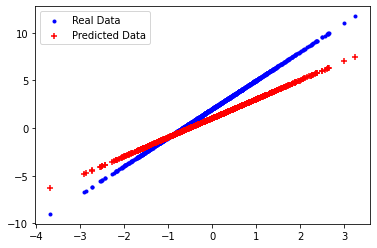

Current loss: 2.015457


In [10]:
plot_data(xs, ys, model(xs))
print(f'Current loss: {loss(model(xs), ys).numpy():1.6f}')

## Define a training loop manually

In [12]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

## Perform the training

In [13]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, 0.1)
  losses.append(current_loss)
  print(f'Epoch {epoch}2d: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, loss={current_loss:2.5f}')

Epoch 02d: w=2.00 b=1.00, loss=2.01546
Epoch 12d: w=2.21 b=1.20, loss=1.28467
Epoch 22d: w=2.37 b=1.36, loss=0.81895
Epoch 32d: w=2.50 b=1.48, loss=0.52212
Epoch 42d: w=2.60 b=1.59, loss=0.33292
Epoch 52d: w=2.68 b=1.67, loss=0.21230
Epoch 62d: w=2.75 b=1.73, loss=0.13539
Epoch 72d: w=2.80 b=1.79, loss=0.08636
Epoch 82d: w=2.84 b=1.83, loss=0.05508
Epoch 92d: w=2.87 b=1.86, loss=0.03514
Epoch 102d: w=2.90 b=1.89, loss=0.02242
Epoch 112d: w=2.92 b=1.91, loss=0.01431
Epoch 122d: w=2.94 b=1.93, loss=0.00913
Epoch 132d: w=2.95 b=1.94, loss=0.00583
Epoch 142d: w=2.96 b=1.95, loss=0.00372


## Plot w and b changes over time


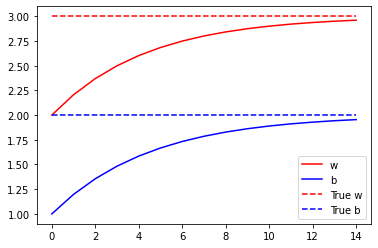

In [14]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Evaluate the model

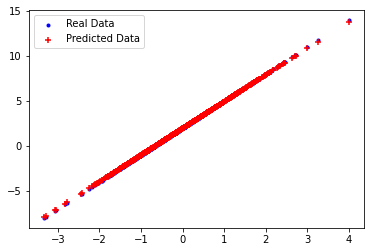

In [15]:
test_inputs = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b
pred_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, pred_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.

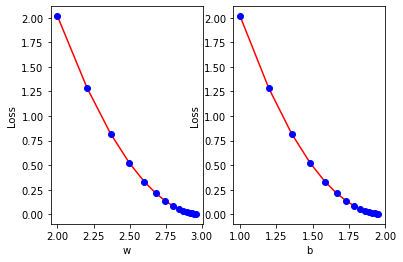

In [18]:
def plot_loss_for_weights(weights_dict, losses):
  for idx, weights in enumerate(weights_dict):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')

weights_dict = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]
plot_loss_for_weights(weights_dict, losses);